# Import setting

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.3f}'.format)
import matplotlib.pyplot as plt
from datetime import datetime
from typing import Callable, Tuple
from strategies import Strategies
from base_setting import Base_setting
from visualize import visualize
from visualize_v2 import visualize as vs2
from visualize_v3 import visualize as vs3

# Data Preprocessing

In [2]:
df_price = pd.read_csv('df_price.csv')
df_spy = pd.read_csv('df_spy.csv')
df_rf = pd.read_csv('df_rf.csv')
def indexing(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index(['Date'])
    return df

df_price = indexing(df_price)
df_spy = indexing(df_spy)
df_rf = indexing(df_rf)

# Functions Define

In [3]:
def check_weight_error(weights):
    """
    Check if the sum of the weights is approximately equal to 1.

    Parameters:
    - weights: dict, dictionary containing asset weights

    Returns:
    - float: sum of the weights
    """
    total_weight = 0
    for key in weights:
        total_weight += weights[key]
    
    total_weight = round(total_weight, 6)
    if total_weight == 1:
        print('Nice allocation')
    else:
        print('Wrong Calculating :(')
        print(f'Sum of given weights is: {total_weight}')
    return total_weight

def check_duplicate_indices(data):
    """
    Check for duplicate indices in the DataFrame.

    Parameters:
    - data: pd.DataFrame, input DataFrame

    Returns:
    - None
    """
    # Check for duplicate indices
    duplicate_indices = data.index.duplicated().any()
    num_of_duplicate = data.index.duplicated().sum()
    if duplicate_indices:
        print(f"{num_of_duplicate} Duplicate indices exist.")
        print("Check out with .index.duplicated() function")
    else:
        print("No duplicate indices.")



# Backtesting

from strategies import Strategies

from base_setting import Base_setting

from visualize import visualize

각 모듈 설명


In [4]:
# for i in range(1,7):
#     ans = input('insert \'y\' to continue')
#     if ans == 'y' :
#         visualize(hand_return.iloc[:i*252],full_return.iloc[:i*252])
#     else:
#         break

#save file

### What if?

Nice allocation


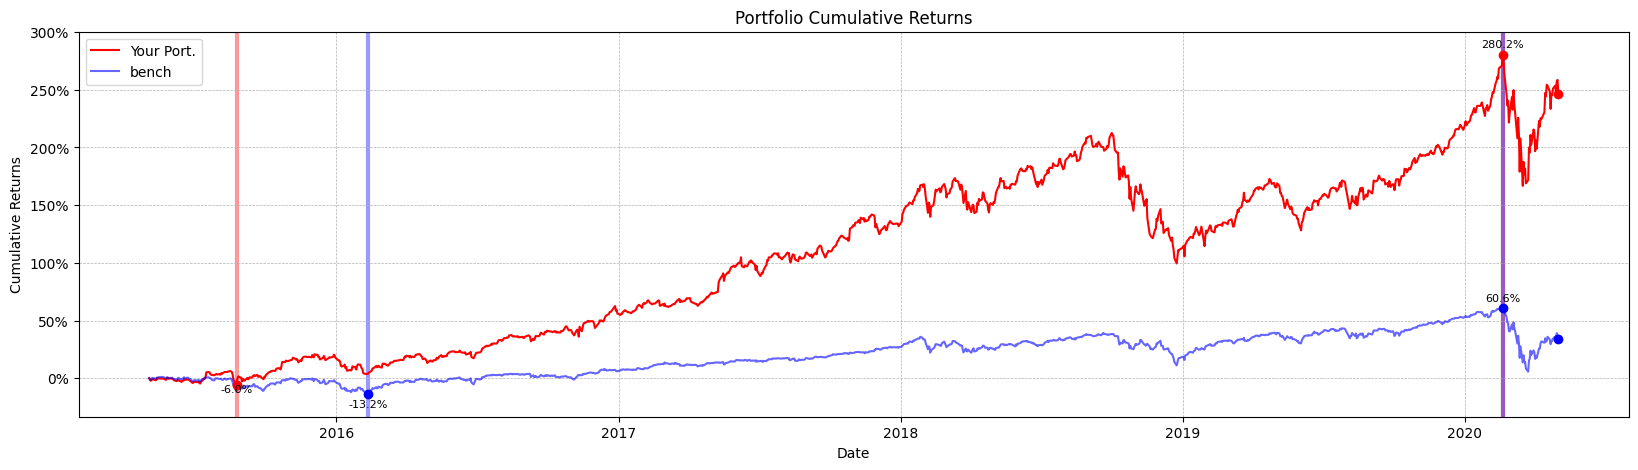

In [5]:
# 투자 유니버스 가격 데이터
data = df_price.copy()

# investment_period = i_p :백테스팅할 투자 기간
i_p = ('2015-05-01','2020-05-01')

# initial_investment = 초기 투자 금액
inv = 10000  # $

# 객체 할당
osj_setting = Base_setting(data=data,investment_period=i_p,initial_investment=inv)
csy_setting = Base_setting(data,i_p,inv)

# 나 이렇게 살거임!
weight =    {'AAPL' : 0.2,
            'GOOG' : 0.2,
            'PEP' : 0.2,
            'KO' : 0.1,
            'MSFT' : 0.1,
            'NVDA' : 0.1,
            'AMZN' : 0.1  
            }

# 비중 계산 확인 
check_weight_error(weight)
 
# 투자 기간 동안 buy_and_hold 실시한 결과
buy_and_hold_port_return = csy_setting.run_all(weight)

#비교할 벤치마크 수익률 계산
bench_return = csy_setting.benchmark_return(df_spy)

# 비교해서 퍼포먼스를 나타내는 시각화 파일
visualize(buy_and_hold_port_return,bench_return)


### What if? by momemtum strategy

Nice allocation


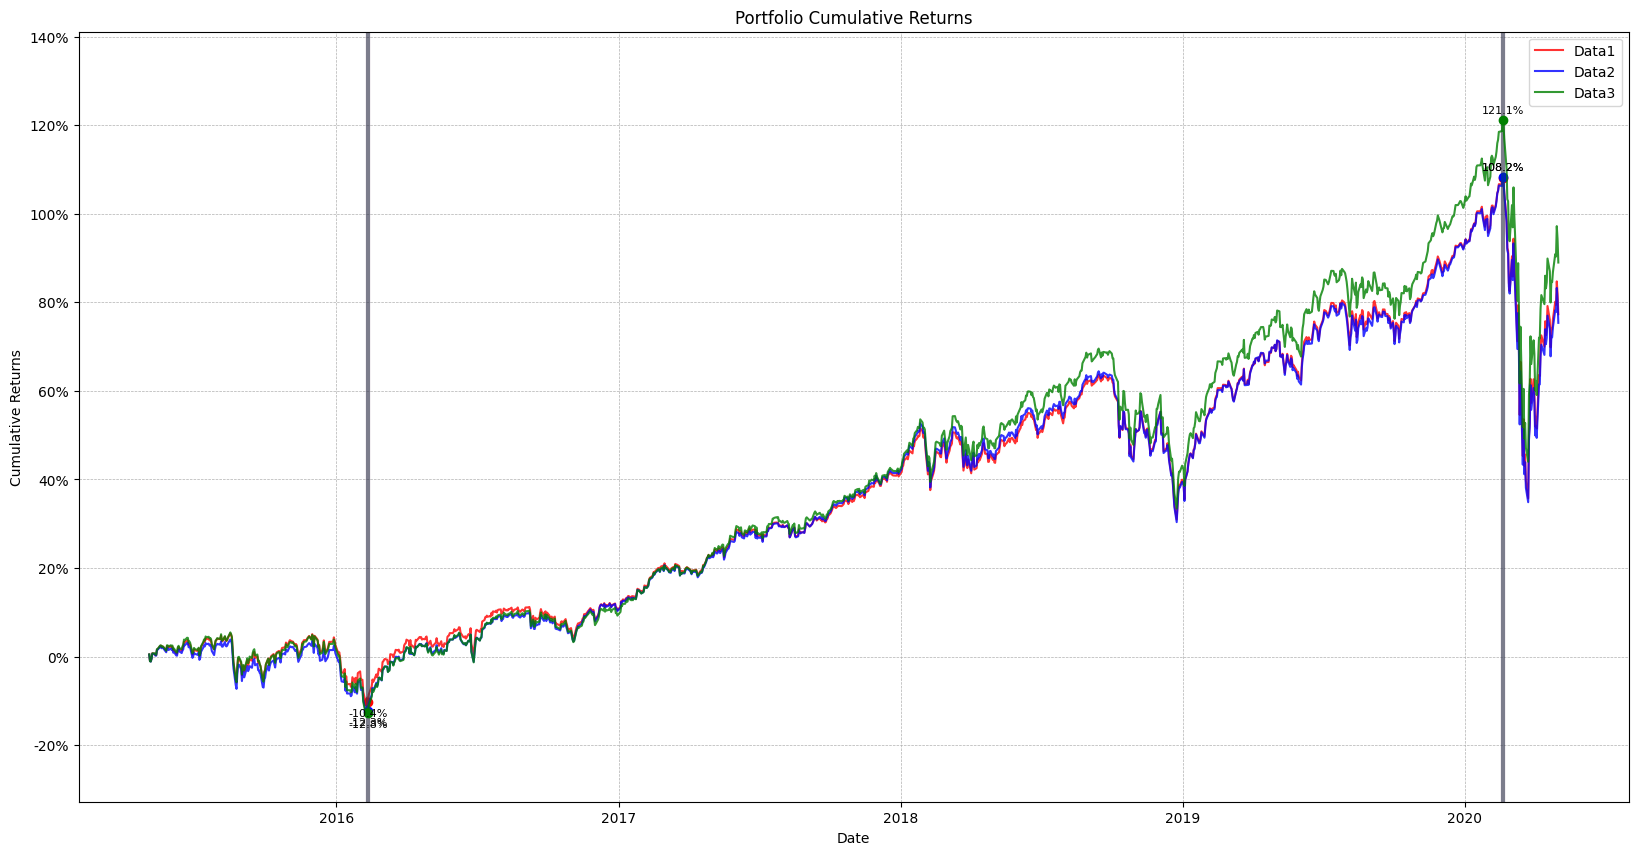

In [6]:
# # 투자 유니버스 가격 데이터
# data = df_price.copy()

# # investment_period = i_p :백테스팅할 투자 기간
# i_p = ('2018-05-01','2022-05-01')

# # initial_investment = 초기 투자 금액
# inv = 10000  # $

# # 객체 할당
# osj_setting = Base_setting(data=data,investment_period=i_p,initial_investment=inv)
# csy_setting = Base_setting(data,i_p,inv)

weight = csy_setting.strategy.momentum_vol_weighted(i_p,252)
weight2 = csy_setting.strategy.momentum_performance_quantile(i_p,252)
weight3 = csy_setting.strategy.momentum_performance_weigthed(i_p,252)

# 비중 계산 확인 
check_weight_error(weight)
 
# 투자 기간 동안 buy_and_hold 실시한 결과
buy_and_hold_mom_port_return = csy_setting.run_all(weight)
buy_and_hold_mom_port_return2 = csy_setting.run_all(weight2)
buy_and_hold_mom_port_return3 = csy_setting.run_all(weight3)
#비교할 벤치마크 수익률 계산
bench_return = csy_setting.benchmark_return(df_spy)

# 비교해서 퍼포먼스를 나타내는 시각화 파일
vs2(buy_and_hold_mom_port_return,buy_and_hold_mom_port_return2,buy_and_hold_mom_port_return3)


### your port vs momentum vs bench

In [7]:
for i in range(1,10):
    ans = input('insert \'y\' to continue')
    if ans == 'y' :
        vs3(buy_and_hold_port_return.iloc[:i*126],buy_and_hold_mom_port_return3.iloc[:i*126],bench_return.iloc[:i*126])
    else:
        break


# Rebalancing by Algorithm

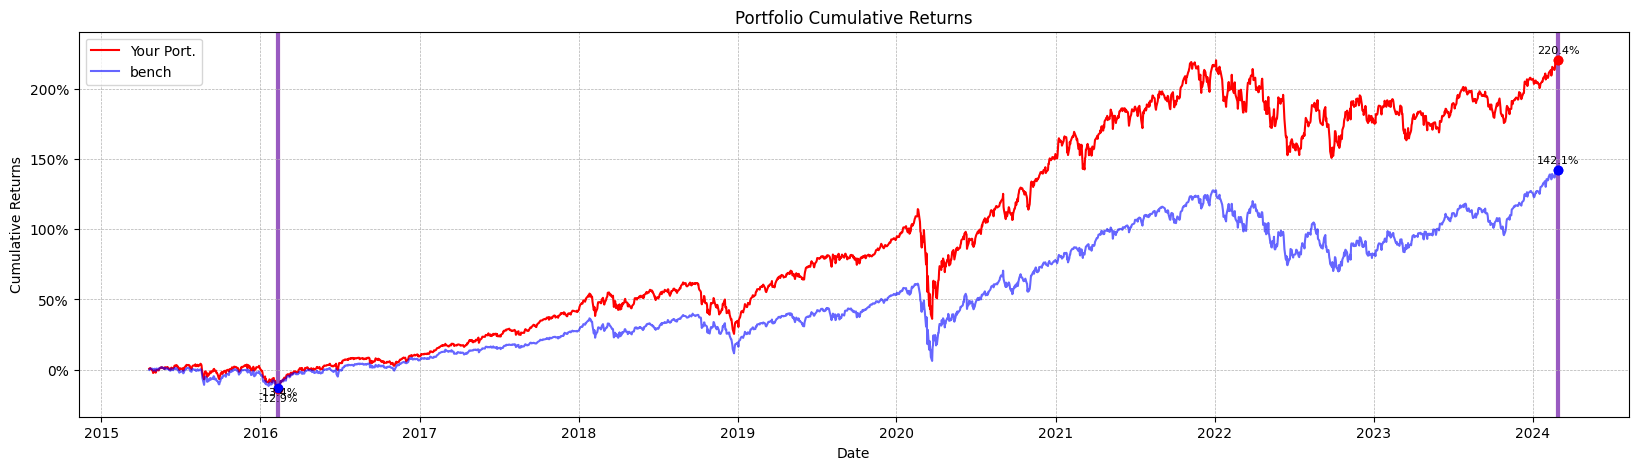

In [8]:
# 투자 유니버스 가격 데이터
data = df_price.copy()

# investment_period = i_p :백테스팅할 투자 기간
i_p = ('2015-04-20','2016-04-20')

# 리밸런싱 기간 
n = 252

# initial_investment = 초기 투자 금액
inv = 10000  # $

# 객체 할당
csy_setting = Base_setting(data,i_p,inv)
 
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return = csy_setting.port_return(rebalanced_port)

#비교할 벤치마크 수익률 계산
bench_return = csy_setting.benchmark_full_return(df_spy)

# 비교해서 퍼포먼스를 나타내는 시각화 파일
visualize(rebalanced_port_return,bench_return)


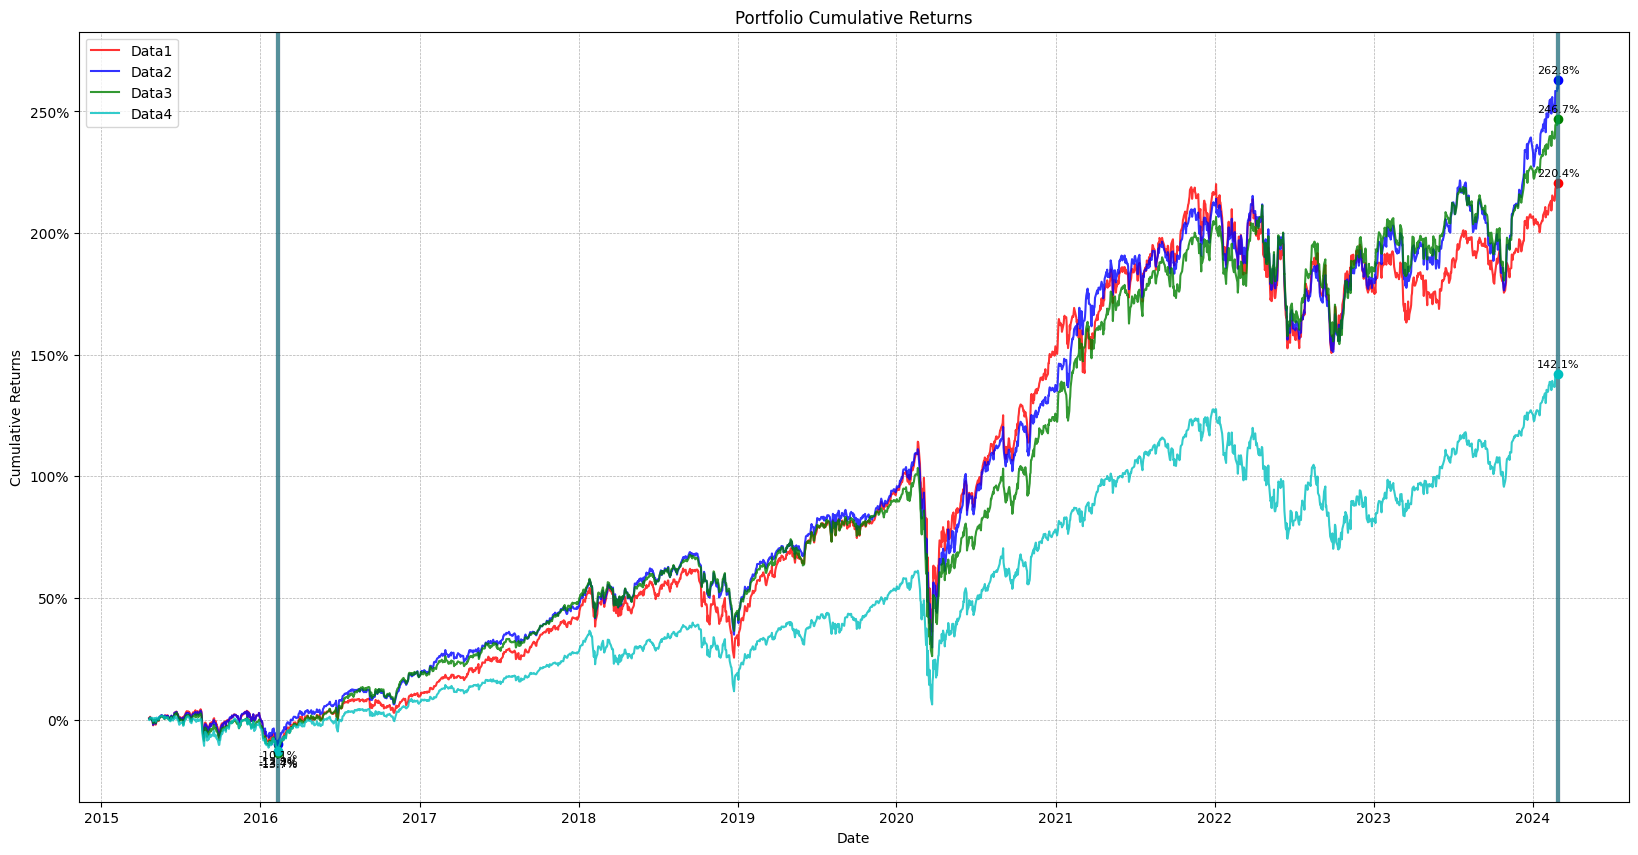

In [9]:
n = 121

# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port2 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return2 = csy_setting.port_return(rebalanced_port2)

n = 60
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port3 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return3 = csy_setting.port_return(rebalanced_port3)


# 비교해서 퍼포먼스를 나타내는 시각화 파일
vs2(rebalanced_port_return,rebalanced_port_return2,rebalanced_port_return3,bench_return)


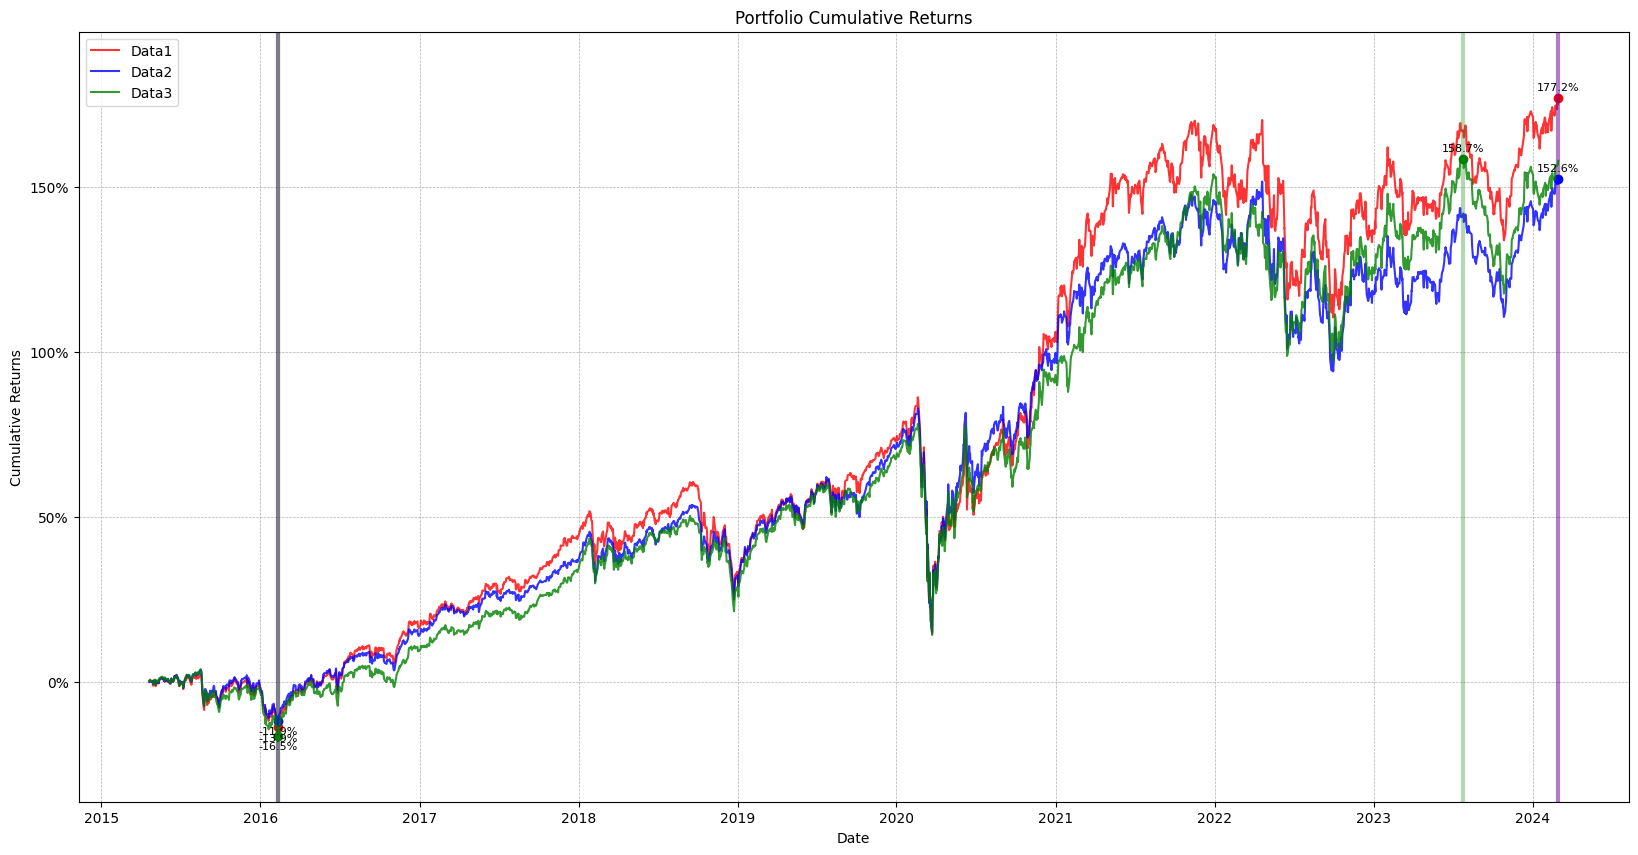

In [10]:
n = 30

# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port4 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return4 = csy_setting.port_return(rebalanced_port4)

n = 20
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port5 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return5 = csy_setting.port_return(rebalanced_port5)

n = 10
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port6 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return6 = csy_setting.port_return(rebalanced_port6)

# 비교해서 퍼포먼스를 나타내는 시각화 파일
vs2(rebalanced_port_return4,rebalanced_port_return5,rebalanced_port_return6)


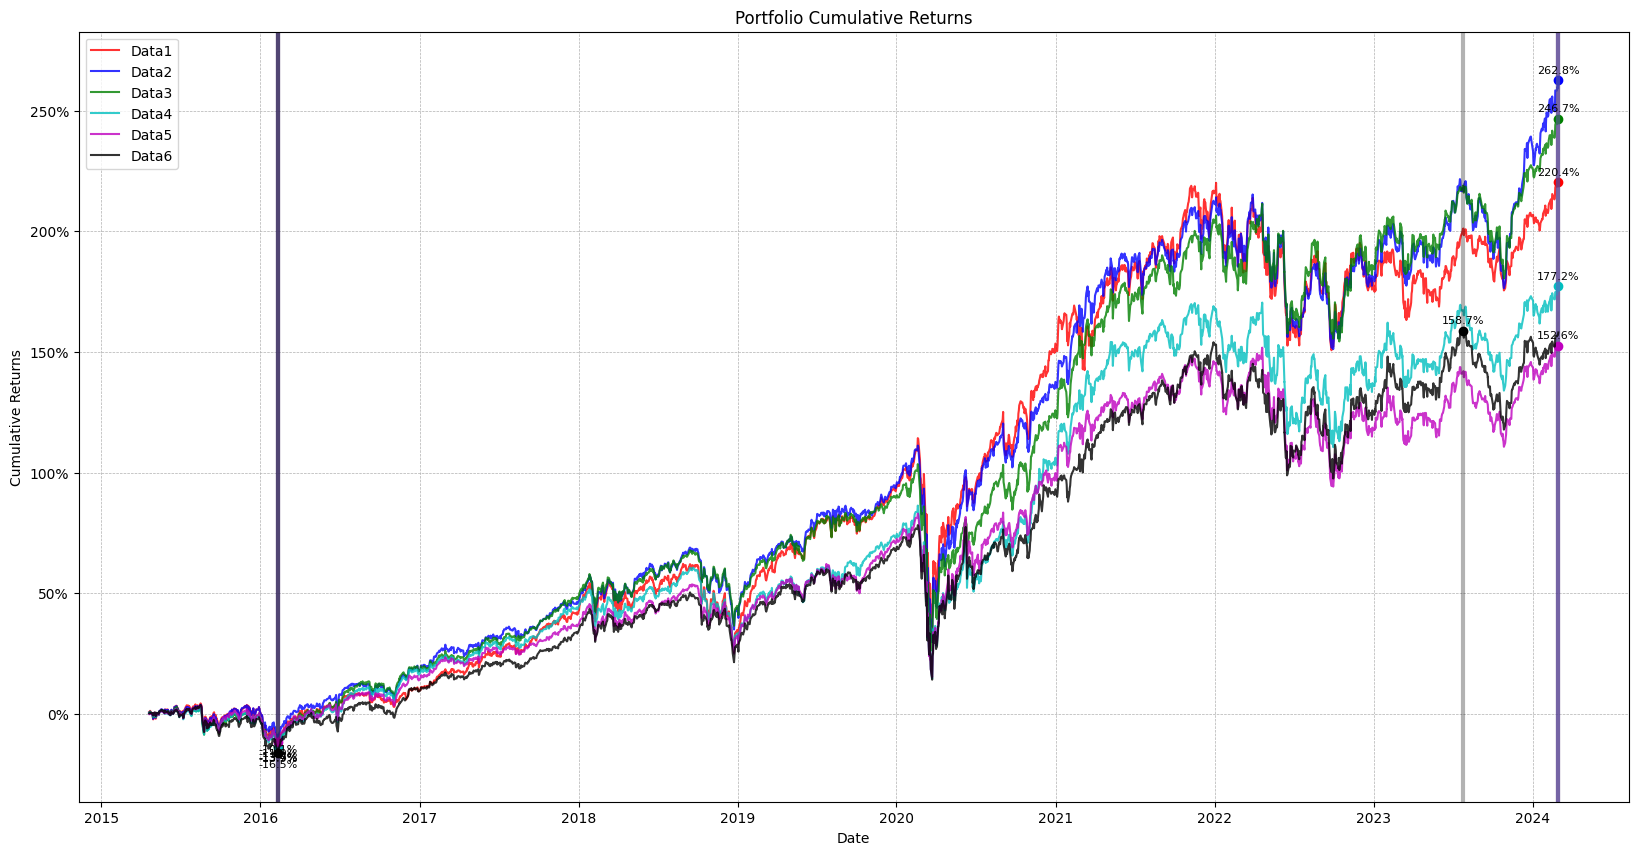

In [11]:
vs2(rebalanced_port_return,rebalanced_port_return2,rebalanced_port_return3,rebalanced_port_return4,rebalanced_port_return5,rebalanced_port_return6)

# Rebalance by my hand

In [12]:
# 투자 유니버스 가격 데이터
data = df_price.copy()

# investment_period = i_p :백테스팅할 투자 기간
i_p = ('2015-04-20','2016-04-20')

# 리밸런싱 기간 
n = 121

# initial_investment = 초기 투자 금액
inv = 10000  # $

# 객체 할당
csy_setting = Base_setting(data,i_p,inv)
 
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port = csy_setting.by_hand_rebalancing(window=n)

# 나 이렇게 살거임!
'''
{'AAPL' : 0.2,
'GOOG' : 0.2,
'PEP' : 0.2,
'KO' : 0.1,
'MSFT' : 0.1,
'NVDA' : 0.1,
'AMZN' : 0.1  
}
'''
rebalanced_port_return = csy_setting.port_return(rebalanced_port)

#비교할 벤치마크 수익률 계산
bench_return = csy_setting.benchmark_full_return(df_spy)

# 비교해서 퍼포먼스를 나타내는 시각화 파일
#visualize(rebalanced_port_return,bench_return)ㅜ



NameError: name 'ᄎ' is not defined

# Performance comparing

In [13]:
from performance import *

In [16]:
rebalanced_port

,IQV,AMCR,TECH,XRAY,VFC,TRMB,APTV,ZION,ANSS,MMM,...,ARE,ZTS,STE,TSCO,MSCI,APA,LLY,HLT,ICE,Total_value
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-20,31.562,12.255,16.585,13.260,22.729,0.000,26.069,0.000,16.170,20.255,...,24.597,61.422,37.519,27.732,42.749,0.000,21.448,36.135,15.376,10000.000
2015-04-21,31.662,12.255,16.590,13.335,22.839,0.000,25.975,0.000,16.201,20.192,...,24.801,62.075,37.788,28.450,42.700,0.000,21.389,36.438,15.270,10070.940
2015-04-22,31.543,12.255,16.603,13.456,22.710,0.000,25.928,0.000,16.265,20.275,...,24.738,61.409,37.912,28.453,43.212,0.000,21.416,36.329,15.372,10085.053
2015-04-23,32.132,12.255,16.745,13.402,22.710,0.000,26.025,0.000,16.461,19.658,...,24.862,61.435,38.057,28.588,43.668,0.000,21.445,36.680,15.343,10118.733
2015-04-24,32.796,12.255,16.439,13.479,22.646,0.000,26.125,0.000,16.347,19.575,...,24.928,62.558,38.090,28.500,44.011,0.000,21.203,36.644,15.220,10092.582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23,54.379,20.178,22.465,0.000,0.000,0.000,0.000,52.742,0.000,0.000,...,32.951,57.097,67.709,92.728,44.518,295.353,465.756,131.247,43.872,31878.442
2024-02-26,54.428,19.895,22.556,0.000,0.000,0.000,0.000,51.918,0.000,0.000,...,32.189,57.048,67.094,92.590,44.437,291.321,467.196,130.266,43.723,31851.944
2024-02-27,54.727,19.482,22.964,0.000,0.000,0.000,0.000,52.269,0.000,0.000,...,32.889,57.615,66.753,95.829,43.647,297.025,463.008,130.638,43.951,31938.158


In [14]:
total_value_series = rebalanced_port['Total_value']
cagr = calculate_cagr(total_value_series)
mdd = calculate_mdd(total_value_series)
total_return_serires = rebalanced_port_return['Total_return']
sharpe = calculate_sharpe_ratio(total_return_serires,df_rf=df_rf)

In [15]:
performance_dict = {'CAGR' : cagr,
                    'MDD' : mdd[0],
                    'SHARPE' : sum([item[2] for item in sharpe])/len([item[2] for item in sharpe])}

perform = pd.DataFrame(index=(0,1),data=performance_dict)

perform

,CAGR,MDD,SHARPE
0,0.140,-0.364,0.842
1,0.140,-0.364,0.842
